<a href="https://colab.research.google.com/github/PondKann/CXR-Project/blob/main/Score_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### import

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import cv2
import numpy as np
import pandas as pd
from torchsummary import summary
from skimage.io import imread, imsave
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import PIL
from PIL import Image


In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import datasets, layers, models

from imutils import paths
import argparse

from sklearn.model_selection import KFold
from sklearn import metrics
from scipy.stats import zscore


import matplotlib.image as mpimg
from matplotlib.pyplot import savefig

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

#### Load data // KKU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Senior Project/CXR Image3class/Image'

train 3 class

In [ ]:
Normal151_dir = os.path.join(data_dir,'Normal151')
TB150_dir = os.path.join(data_dir,'TB150')
CA150_dir = os.path.join(data_dir,'CA150')

All_3class_dir = os.path.join(data_dir,'All_3class')

#### Load data // Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Senior Project/CXR Image3class'

train 3 class

In [ ]:
Normal151_dir = os.path.join(data_dir,'Normal151')
TB150_dir = os.path.join(data_dir,'TB150')
CA150_dir = os.path.join(data_dir,'CA150')

All_3class_dir = os.path.join(data_dir,'All_3class')

# แบบ 1
- maps ยังไม่ได้
- ยังไม่ครบ

https://towardsdatascience.com/demystifying-convolutional-neural-networks-using-scorecam-344a0456c48e

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [ ]:
image = '/content/tb12.jpg'

In [ ]:
image = load_img('/content/plastic.jpg', target_size= (224,224))
img = img_to_array(image)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img = np.expand_dims(img, axis=0)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
img = preprocess_input(img)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
img

array([[[[-55.939003  ,   0.22100067, -57.68      ],
         [-50.939003  ,   5.2210007 , -52.68      ],
         [-41.939003  ,  15.221001  , -44.68      ],
         ...,
         [-63.939003  , -14.778999  , -75.68      ],
         [-80.939     , -28.779     , -90.68      ],
         [-35.939003  ,  16.221     , -45.68      ]],

        [[-43.939003  ,  12.221001  , -45.68      ],
         [-49.939003  ,   6.2210007 , -51.68      ],
         [-34.939003  ,  22.221     , -37.68      ],
         ...,
         [-38.939003  ,  13.221001  , -48.68      ],
         [-52.939003  ,  -1.7789993 , -60.68      ],
         [-31.939003  ,  19.221     , -39.68      ]],

        [[-40.939003  ,  15.221001  , -42.68      ],
         [-41.939003  ,  14.221001  , -43.68      ],
         [-12.939003  ,  44.221     , -15.68      ],
         ...,
         [-59.939003  ,  -8.778999  , -67.68      ],
         [-23.939003  ,  26.221     , -30.68      ],
         [-22.939003  ,  27.221     , -29.68      ]],

In [ ]:
plt.imshow(image)

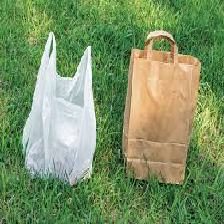

In [ ]:
image

In [ ]:
model = tf.keras.applications.VGG16(weights="imagenet")

In [ ]:
pred = model.predict(img)

In [ ]:
from keras.applications.imagenet_utils import decode_predictions
print( "predict", decode_predictions(pred, top=5)[0])

predict [('n03958227', 'plastic_bag', 0.5561434), ('n03709823', 'mailbag', 0.17960724), ('n04026417', 'purse', 0.04383272), ('n04204238', 'shopping_basket', 0.043442283), ('n03482405', 'hamper', 0.016519293)]


In [ ]:
target = np.argmax(pred, axis=1).item()
print(target)

728


In [ ]:
layer_outputs = model.layers[-6].output  
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
layer_outputs.shape

TensorShape([None, 14, 14, 512])

In [ ]:
maps.shape

In [ ]:
# from numpy.core.fromnumeric import resize
from skimage.transform import resize      #resize เหมือนจะยังไม่ถูก
def upsample(input_shape, image):
    input_width = input_shape[0]
    input_height = input_shape[1]
    image = resize(image,( input_width, input_height), preserve_range = True )
    return image

In [ ]:
#4
upsampled_activations = []
for x in range(512):
    upsampled_activations.append(upsample([224,224], layer_outputs[0,:,:,x]))

In [ ]:
#5
upsampled_activations = np.array(upsampled_activations)
upsampled_activations.shape

In [ ]:
#6
normalized_activations = []
for n in range(upsampled_activations.shape[0]):
    for x in range(224):
        for y in range(224):

            normalized_activations.append(upsampled_activations[n,x,y]/
                                          ((np.max(upsampled_activations[n,:,:])-np.min(upsampled_activations[n,:,:]))+1e-5))
             

In [ ]:
#7
input_2 = []


# แบบ 2
https://github.com/tabayashi0117/Score-CAM/blob/master/Score-CAM.ipynb

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import Model

def ScoreCam(model, img_array, layer_name, max_N=-1):

    cls = np.argmax(model.predict(img_array))
    act_map_array = Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img_array)
    
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0,:,:,k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:,:,:,max_N_indices]

    input_shape = model.layers[0].output_shape[0][1:]  # get input shape
    # 1. upsample to original input size
    act_map_resized_list = [cv2.resize(act_map_array[0,:,:,k], input_shape[:2], interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[3])]
    # 2. normalize the raw activation value in each activation map into [0, 1]
    act_map_normalized_list = []
    for act_map_resized in act_map_resized_list:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        act_map_normalized_list.append(act_map_normalized)
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in act_map_normalized_list:
        masked_input = np.copy(img_array)
        for k in range(3):
            masked_input[0,:,:,k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)
    # 4. feed masked inputs into CNN model and softmax
    pred_from_masked_input_array = softmax(model.predict(masked_input_array))
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array[:,cls]
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    cam = np.dot(act_map_array[0,:,:,:], weights)
    cam = np.maximum(0, cam)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0
    
    return cam

def softmax(x):
    f = np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims = True)
    return f

In [ ]:
def read_and_preprocess_img(path, size=(224,224)):
    img = load_img(path, target_size=size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

orig_img = np.array(load_img('/content/plastic.jpg'),dtype=np.uint8)
plt.imshow(orig_img)
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from gradcamutils import read_and_preprocess_img
import matplotlib.pyplot as plt

model = VGG16(include_top=True, weights='imagenet')
layer_name = 'block5_conv3'
img_array = read_and_preprocess_img('/content/plastic.jpg')

score_cam = ScoreCam(model,img_array,layer_name)
import matplotlib.pyplot as plt
plt.imshow(score_cam)
plt.show()

In [ ]:
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

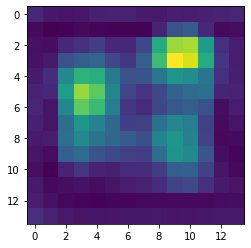

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(score_cam)
plt.show()

ดู layer_name ของ vgg16

In [ ]:
model = VGG16(include_top=True, weights='imagenet')
layer_name = 'block5_conv3'

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow import keras

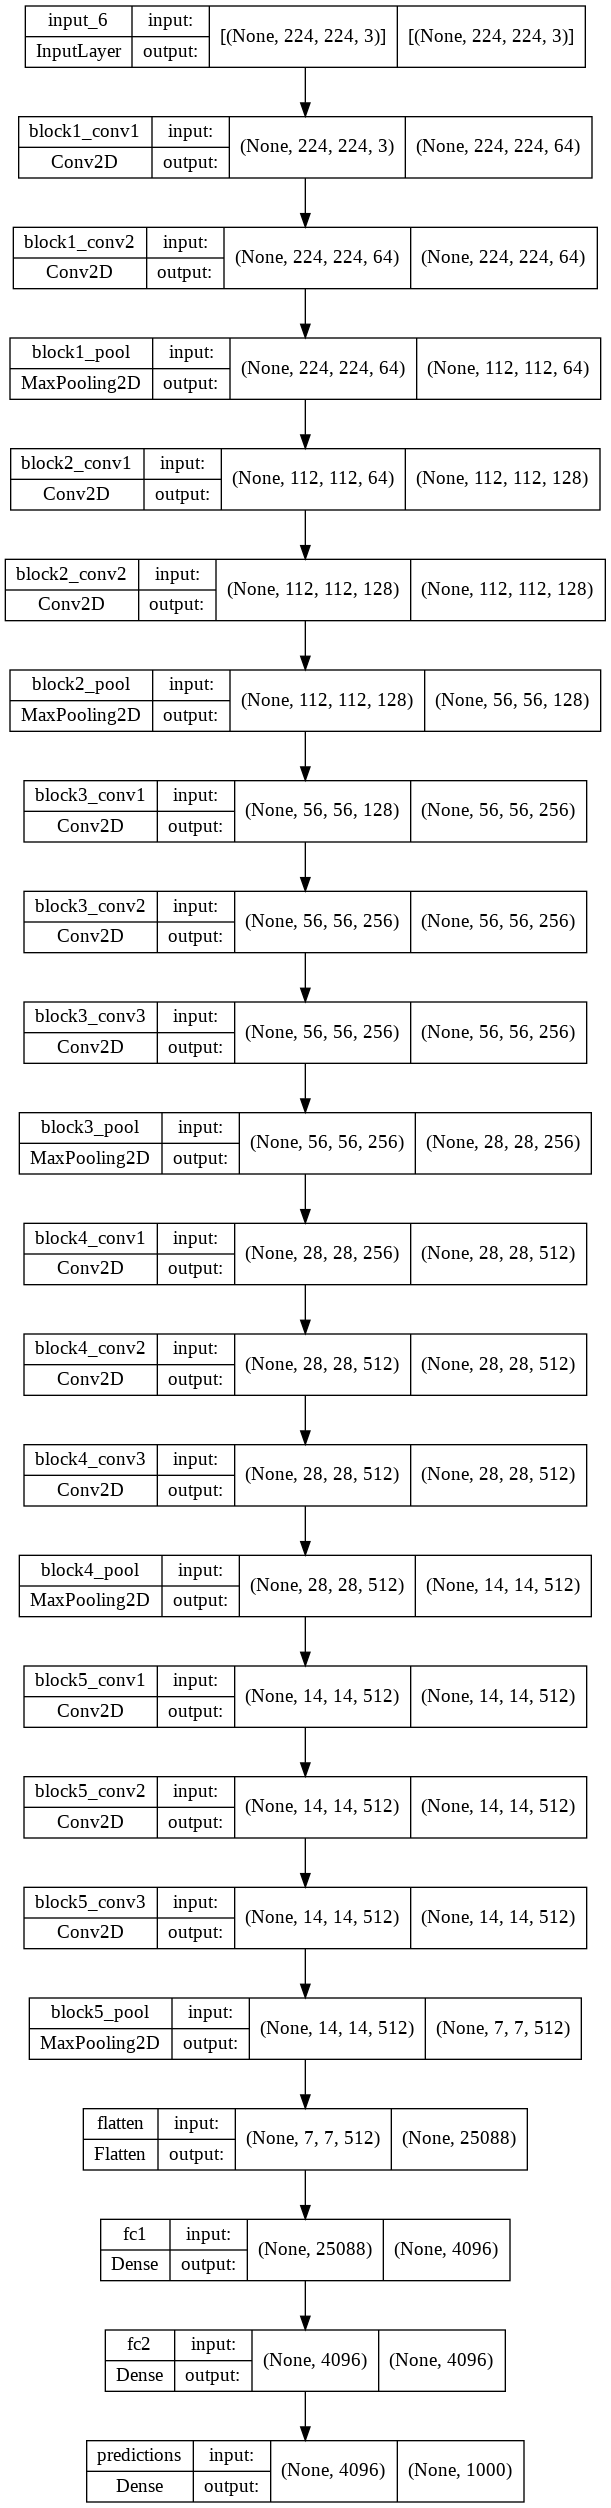

In [ ]:
keras.utils.plot_model(model , show_shapes=True)

# 3
https://github.com/tabayashi0117/Score-CAM/blob/master/gradcamutils.py

In [ ]:
#โมเดลที่เทรนแล้วเซฟมา 
model2 = load_model('model8_soft_pre_bi_adam.h5')

In [ ]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 230, 230, 3)  0          ['input_6[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_10[0][0]']      
                                )                                                           

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit



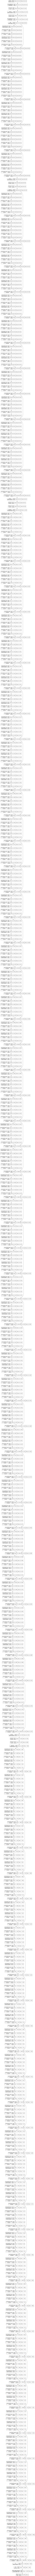

In [ ]:
keras.utils.plot_model(model2 , show_shapes=True)

In [ ]:
def ScoreCam(model, img_array, layer_name, max_N=-1):

    cls = np.argmax(model.predict(img_array))
    act_map_array = Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img_array)
    
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0,:,:,k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:,:,:,max_N_indices]

    input_shape = model.layers[0].output_shape[0][1:]  # get input shape
    # 1. upsampled to original input size
    act_map_resized_list = [cv2.resize(act_map_array[0,:,:,k], input_shape[:2], interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[3])]
    # 2. normalize the raw activation value in each activation map into [0, 1]
    act_map_normalized_list = []
    for act_map_resized in act_map_resized_list:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        act_map_normalized_list.append(act_map_normalized)
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in act_map_normalized_list:
        masked_input = np.copy(img_array)
        for k in range(3):
            masked_input[0,:,:,k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)
    # 4. feed masked inputs into CNN model and softmax
    pred_from_masked_input_array = softmax(model.predict(masked_input_array))
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array[:,cls]
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    cam = np.dot(act_map_array[0,:,:,:], weights)
    cam = np.maximum(0, cam)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0
    
    return cam

In [ ]:
def superimpose(original_img_path, cam, emphasize=False):
    
    img_bgr = cv2.imread(original_img_path)

    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, 0.5, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/ca3.jpg')

cc = ScoreCam(model2,img_array, layer_name = 'relu' , max_N=-1)
ss = superimpose(original_img_path='/content/ca3.jpg', cam=cc, emphasize=False )

In [ ]:
ss

array([[[255, 192,  84],
        [255, 192,  84],
        [255, 192,  84],
        ...,
        [255, 171,  82],
        [255, 171,  82],
        [255, 171,  82]],

       [[215,  63,   0],
        [213,  64,   0],
        [215,  63,   0],
        ...,
        [211,  43,   0],
        [213,  42,   0],
        [211,  43,   0]],

       [[229,  75,   9],
        [228,  76,   7],
        [229,  75,   9],
        ...,
        [225,  54,   4],
        [226,  54,   4],
        [225,  54,   4]],

       ...,

       [[196, 226,  52],
        [196, 226,  52],
        [196, 226,  52],
        ...,
        [154, 237, 255],
        [155, 238, 255],
        [157, 240, 255]],

       [[196, 226,  52],
        [196, 226,  52],
        [196, 226,  52],
        ...,
        [160, 243, 255],
        [159, 242, 255],
        [160, 243, 255]],

       [[196, 226,  52],
        [196, 226,  52],
        [196, 226,  52],
        ...,
        [165, 248, 255],
        [162, 245, 255],
        [163, 246, 255]]

In [ ]:
ss.shape

(445, 364, 3)

In [ ]:
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

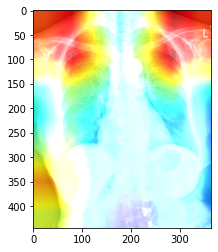

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ss)
plt.show()

In [ ]:
model2.predict(img_array)

array([[9.8397923e-01, 1.9712917e-15, 1.6020779e-02]], dtype=float32)

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/ca3.jpg')

cc = ScoreCam(model2,img_array, layer_name = 'relu' , max_N=-1)
ss = superimpose(original_img_path='ca3.jpg', cam=cc, emphasize=False )

In [ ]:
print(f' output form ScoreCam.shape {cc.shape},  output form superimpose.shape {ss.shape} ')

 output form ScoreCam.shape (7, 7),  output form superimpose.shape (445, 364, 3) 


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('ca3.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

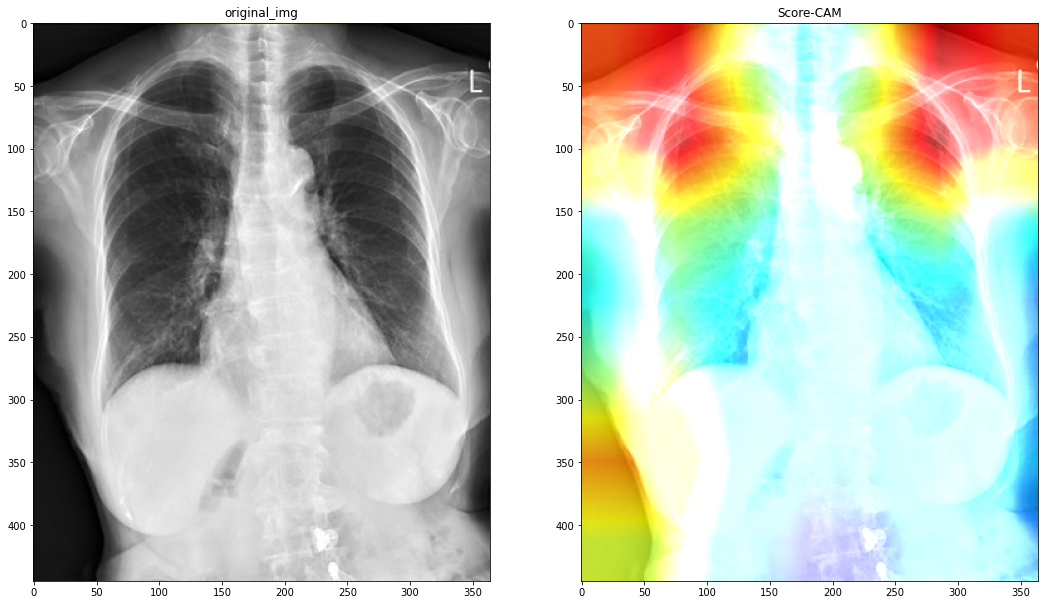

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss)
ax[1].set_title("Score-CAM")

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/ca18.jpg')

cc = ScoreCam(model2,img_array, layer_name = 'relu' , max_N=-1)
ss = superimpose(original_img_path='ca18.jpg', cam=cc, emphasize=False )

In [ ]:
print(f' output form ScoreCam.shape {cc.shape},  output form superimpose.shape {ss.shape} ')

 output form ScoreCam.shape (7, 7),  output form superimpose.shape (435, 420, 3) 


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('ca18.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

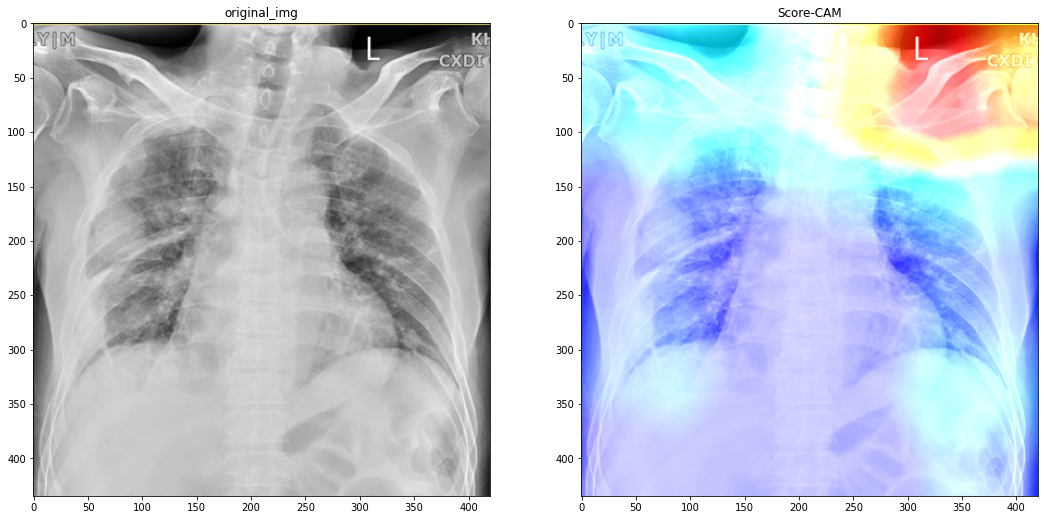

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss)
ax[1].set_title("Score-CAM")

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/10.jpg')

cc = ScoreCam(model2,img_array, layer_name = 'relu' , max_N=-1)
ss = superimpose(original_img_path='10.jpg', cam=cc, emphasize=False )

In [ ]:
print(f' output form ScoreCam.shape {cc.shape},  output form superimpose.shape {ss.shape} ')

 output form ScoreCam.shape (7, 7),  output form superimpose.shape (621, 527, 3) 


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('10.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

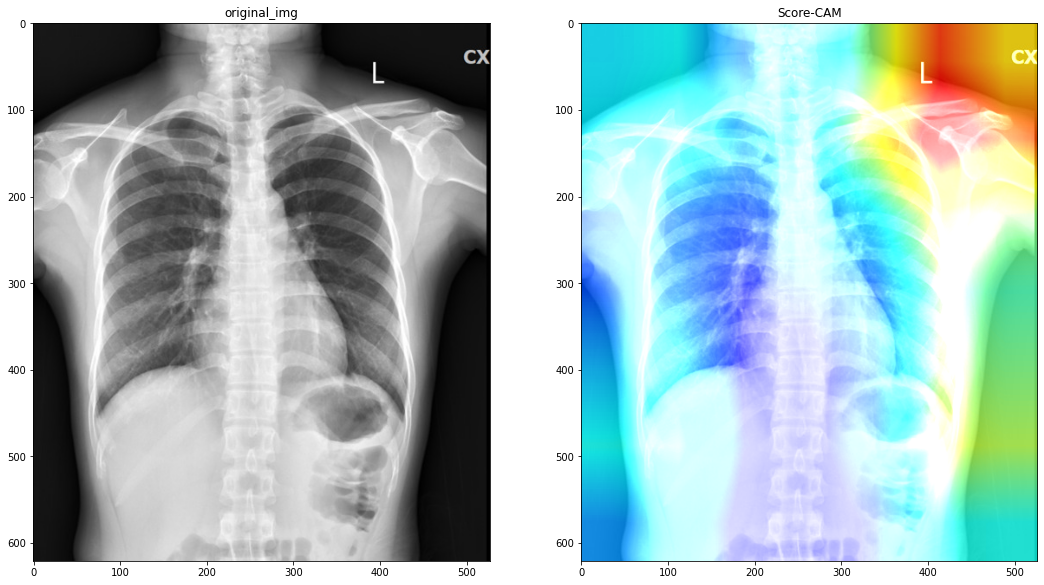

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss)
ax[1].set_title("Score-CAM")

### BN

In [ ]:
cc2 = ScoreCam(model2,img_array, layer_name = 'bn' , max_N=-1)

In [ ]:
ss2 = superimpose(original_img_path='/content/ca3.jpg', cam=cc2, emphasize=False )

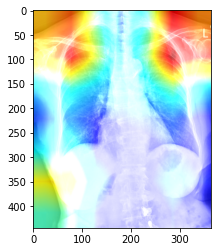

In [ ]:
plt.imshow(ss2)
plt.show()

แสดงรูปคู่กัน

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('ca3.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

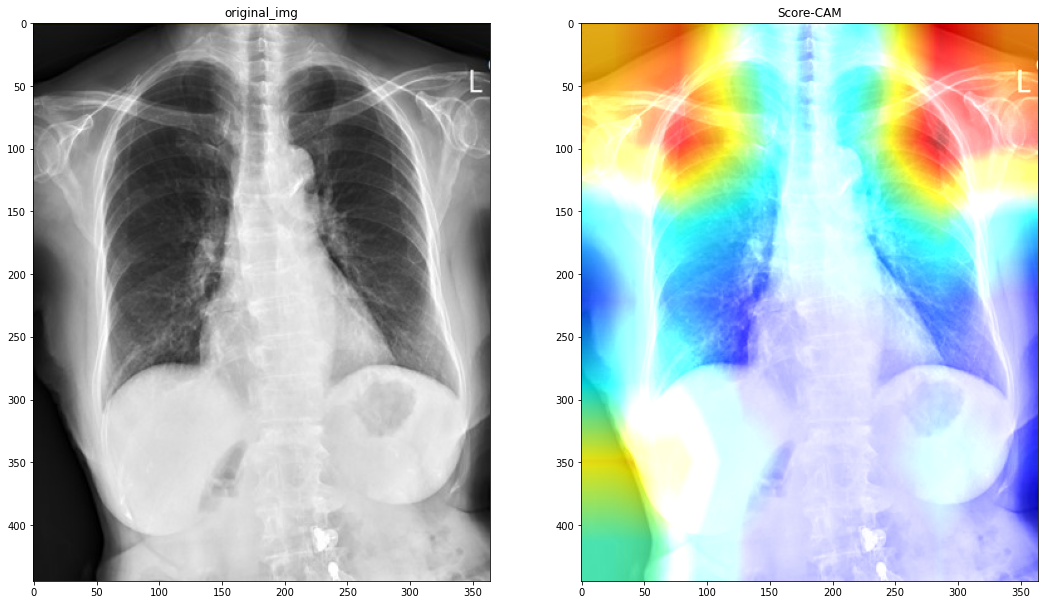

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss2)
ax[1].set_title("Score-CAM")

ลองรูปใหม่ 
 layer_name = 'bn' 

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/ca18.jpg')

cc4 = ScoreCam(model2,img_array, layer_name = 'bn' , max_N=-1)

In [ ]:
ss4 = superimpose(original_img_path='/content/ca18.jpg', cam=cc4, emphasize=False )

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('ca18.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

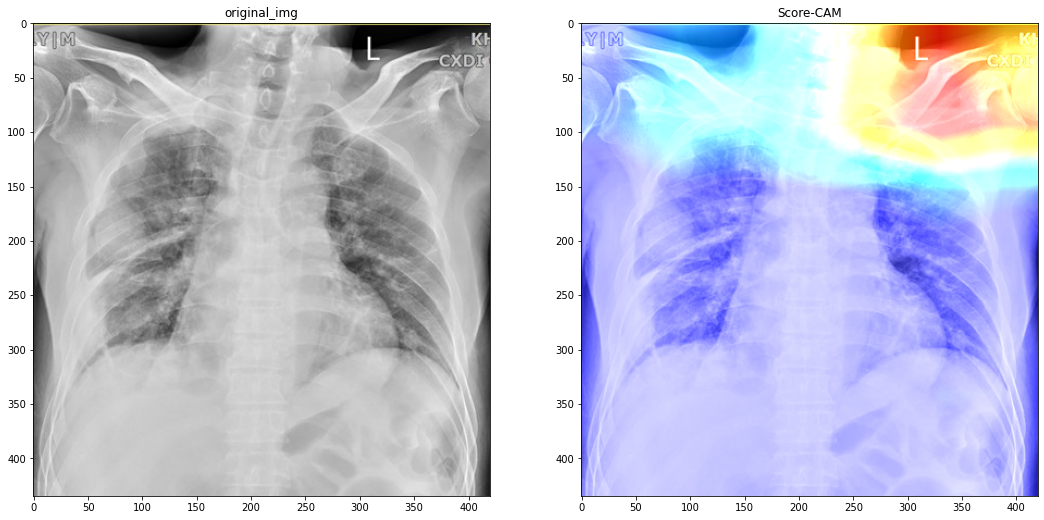

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss4)
ax[1].set_title("Score-CAM")

In [ ]:
model2.predict(img_array)

array([[9.8281658e-01, 1.8972275e-11, 1.7183401e-02]], dtype=float32)

ลองรูป normal -->  ayer_name = 'bn' 

In [ ]:
#read_and_preprocess_img คือฟังก์ชันที่สร้างไว้ใน แบบ 2 
img_array = read_and_preprocess_img('/content/10.jpg')

cc5 = ScoreCam(model2,img_array, layer_name = 'bn' , max_N=-1)

In [ ]:
ss5 = superimpose(original_img_path='/content/10.jpg', cam=cc5, emphasize=False )

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('10.jpg')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Score-CAM')

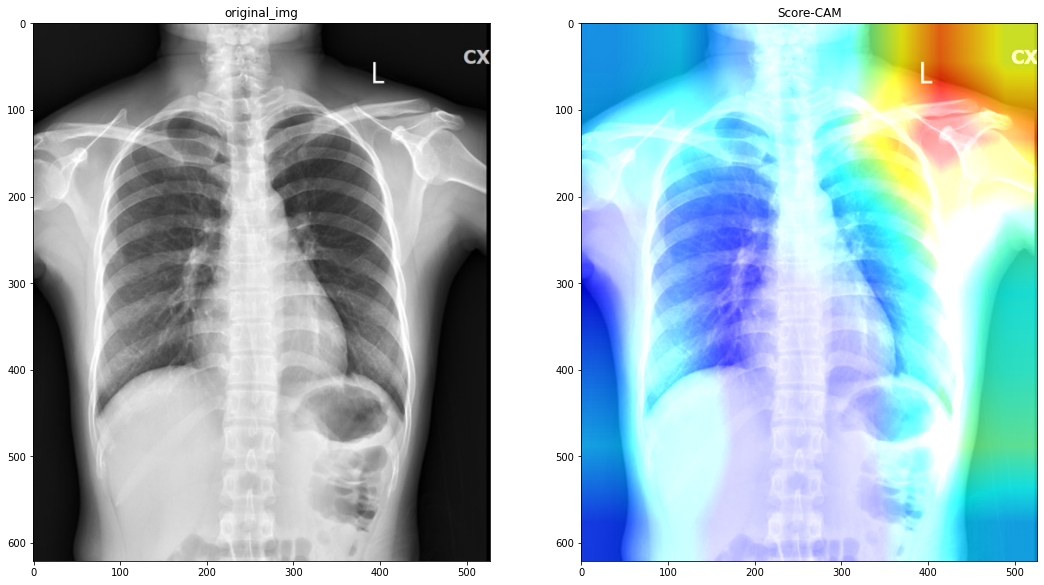

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 11))
ax[0].imshow(img)
ax[0].set_title("original_img")
ax[1].imshow(ss5)
ax[1].set_title("Score-CAM")

In [ ]:
model2.predict(img_array)

array([[1.0000000e+00, 6.0681947e-25, 8.2688988e-11]], dtype=float32)

In [ ]:
cc3 = ScoreCam(model2,img_array, layer_name = 'conv5_block32_concat' , max_N=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
ss3 = superimpose(original_img_path='/content/ca3.jpg', cam=cc3, emphasize=False )

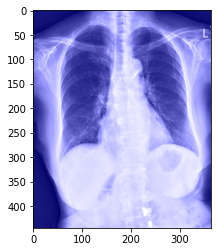

In [ ]:
plt.imshow(ss3)
plt.show()